# Home Depot Product Relevance

### Introduction / Abstract :

We are in the 21st century where everything is digitized and can be accessed by the 
internet .Education to Shopping everything can be purchase or sell on the internet . The user 
just need to enter the search query and you can see the top results related to query . It is 
important to provide relevent results for the search query.The companies like 
Google,Amazon,Netflix are top notch in this business.
This data set contains a number of products and real customer search terms from Home 
Depot's website. The challenge is to predict a relevance score for the provided combinations 
of search terms and products. To create the ground truth labels, Home Depot has 
crowdsourced the search/product pairs to multiple human raters.

# EDA on basic data 

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import zipfile
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

## Train Data

In [2]:
train_data = zipfile.ZipFile('G:/Applied_AI/case_study_1/train.csv.zip')
train_data = pd.read_csv(train_data.open('train.csv'),encoding = "ISO-8859-1")

In [3]:
train_data.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [4]:
train_data.columns

Index(['id', 'product_uid', 'product_title', 'search_term', 'relevance'], dtype='object')

In [5]:
print('Train_Data shape :',train_data.shape)

Train_Data shape : (74067, 5)


In [6]:
train_data.isnull().sum()

id               0
product_uid      0
product_title    0
search_term      0
relevance        0
dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74067 entries, 0 to 74066
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             74067 non-null  int64  
 1   product_uid    74067 non-null  int64  
 2   product_title  74067 non-null  object 
 3   search_term    74067 non-null  object 
 4   relevance      74067 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


### Feature: Product uid

In [8]:
train_data['product_uid'].value_counts()

101959    21
102893    21
101892    18
104691    17
101539    17
          ..
156132     1
154083     1
113119     1
100825     1
133121     1
Name: product_uid, Length: 54667, dtype: int64

In [9]:
print('Toatl no. of products :',len(train_data['product_uid'].values))
print('Total no. of Unique products :',len(train_data['product_uid'].unique()))

Toatl no. of products : 74067
Total no. of Unique products : 54667


101959    21
102893    21
101892    18
104691    17
101539    17
          ..
156132     1
154083     1
113119     1
100825     1
133121     1
Name: product_uid, Length: 54667, dtype: int64
----------------------------------------------------------------------------------------------------


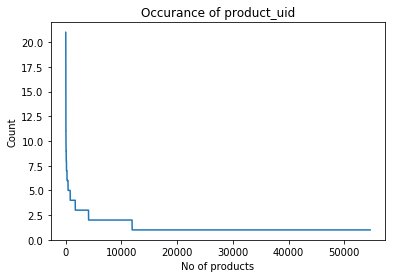

In [10]:
product_uid_train = train_data['product_uid'].value_counts()
print(product_uid_train)
print('-'*100)
plt.plot(product_uid_train.values)
plt.title('Occurance of product_uid')
plt.xlabel('No of products')
plt.ylabel('Count')
plt.show()

The graph shows that how many times a product repeat itself .The minimum occurance is of 1 time and maximum is of 21 times

### Feature: Product_title

In [11]:
train_data['product_title'].values[:20]

array(['Simpson Strong-Tie 12-Gauge Angle',
       'Simpson Strong-Tie 12-Gauge Angle',
       'BEHR Premium Textured DeckOver 1-gal. #SC-141 Tugboat Wood and Concrete Coating',
       'Delta Vero 1-Handle Shower Only Faucet Trim Kit in Chrome (Valve Not Included)',
       'Delta Vero 1-Handle Shower Only Faucet Trim Kit in Chrome (Valve Not Included)',
       'Whirlpool 1.9 cu. ft. Over the Range Convection Microwave in Stainless Steel with Sensor Cooking',
       'Whirlpool 1.9 cu. ft. Over the Range Convection Microwave in Stainless Steel with Sensor Cooking',
       'Whirlpool 1.9 cu. ft. Over the Range Convection Microwave in Stainless Steel with Sensor Cooking',
       'Lithonia Lighting Quantum 2-Light Black LED Emergency Fixture Unit',
       'House of Fara 3/4 in. x 3 in. x 8 ft. MDF Fluted Casing',
       'Valley View Industries Metal Stakes (4-Pack)',
       'Toro Personal Pace Recycler 22 in. Variable Speed Self-Propelled Gas Lawn Mower with Briggs &amp; Stratton Engine',
 

Lithonia Lighting All Season 4 ft. 2-Light Grey T8 Strip Fluorescent Shop Light                                          21
Pressure-Treated Timber #2 Southern Yellow Pine (Common: 4 in. x 4 in. x 8 ft.; Actual: 3.56 in. x 3.56 in. x 96 in.)    21
2 in. x 4 in. x 96 in. Premium Kiln-Dried Whitewood Stud                                                                 18
Ryobi ONE+ 18-Volt Lithium-Ion Ultimate Combo Kit (6-Tool)                                                               17
Custom Building Products VersaBond Gray 50 lb. Fortified Thin-Set Mortar                                                 17
                                                                                                                         ..
Nostalgia Electrics Vintage Collection Snow Cone Maker                                                                    1
Ettore Window Wand with 16 in. Handle - DISCONTINUED                                                                      1
Trademar

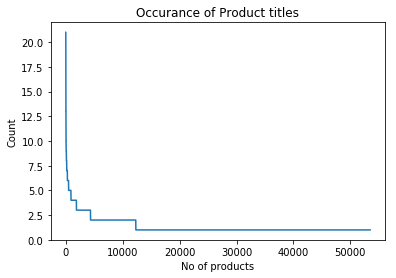

In [12]:
product_title = train_data['product_title'].value_counts()
print(product_title)
print('-'*100)
plt.plot(product_title.values)
plt.title('Occurance of Product titles')
plt.xlabel('No of products')
plt.ylabel('Count')
plt.show()

The graph shows that how many times product title repeat itself . product title repeat itself of min 1 time and max 21 time

In [13]:
len_product_title = train_data['product_title'].str.strip().apply(len)

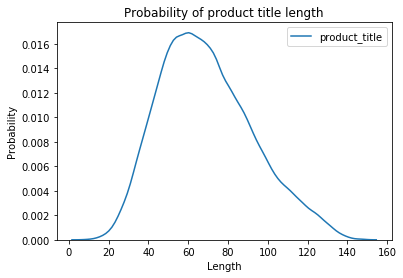

In [14]:
sns.kdeplot(len_product_title)
plt.title('Probability of product title length')
plt.xlabel('Length')
plt.ylabel('Probability')
plt.show()

The probability graph for length of product title where length is on x axis and probability score on y axis

In [15]:
print(20*'-','length of product title',20*'-')
print(20*'-','percentile 0 to 100',20*'-')
for i in range(0,101,10):
    print(i,'th percentile = ',np.percentile(len_product_title,i))
print(20*'-','percentile 91 to 100',20*'-')
for i in range(91,101,1):
    print(i,'th percentile = ',np.percentile(len_product_title,i))

-------------------- length of product title --------------------
-------------------- percentile 0 to 100 --------------------
0 th percentile =  9.0
10 th percentile =  41.0
20 th percentile =  49.0
30 th percentile =  55.0
40 th percentile =  61.0
50 th percentile =  67.0
60 th percentile =  73.0
70 th percentile =  80.0
80 th percentile =  89.0
90 th percentile =  102.0
100 th percentile =  147.0
-------------------- percentile 91 to 100 --------------------
91 th percentile =  104.0
92 th percentile =  106.0
93 th percentile =  108.0
94 th percentile =  110.0
95 th percentile =  113.0
96 th percentile =  116.0
97 th percentile =  119.0
98 th percentile =  123.0
99 th percentile =  128.0
100 th percentile =  147.0


### Feature: Search Term

everblit heavy duty canvas dropcloth         16
3 WAY TOGGLE SWITCH                          16
bed frames headboaed                         16
moen chat oil bronze tub/shower faucet       16
1/2 zip wall                                 16
                                             ..
anti icky poo                                 1
tin snips long                                1
self sticking tile                            1
multinozzle spray painting                    1
air cleaner replacement 20 in x 25 in x 6     1
Name: search_term, Length: 11795, dtype: int64
----------------------------------------------------------------------------------------------------


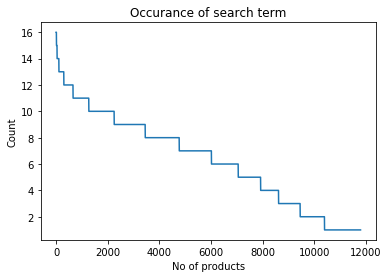

In [16]:
search_term_train = train_data['search_term'].value_counts()
print(search_term_train)
print('-'*100)
plt.plot(search_term_train.values)
plt.title('Occurance of search term')
plt.ylabel('Count')
plt.xlabel('No of products')
plt.show()

The graph shows that the occurance of search terms. There are few search terms which occurs 1 time and the maximum occurance is 16 times

In [17]:
train_data['search_term'][:10]

0           angle bracket
1               l bracket
2               deck over
3        rain shower head
4      shower only faucet
5          convection otr
6    microwave over stove
7              microwaves
8         emergency light
9                 mdf 3/4
Name: search_term, dtype: object

In [18]:
len_search_term = train_data['search_term'].str.strip().apply(len)

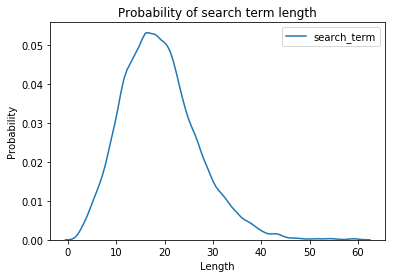

In [19]:
sns.kdeplot(len_search_term)
plt.title('Probability of search term length')
plt.xlabel('Length')
plt.ylabel('Probability')
plt.show()

In [20]:
print(20*'-','length of search term',20*'-')
print(20*'-','percentile 0 to 100',20*'-')
for i in range(0,101,10):
    print(i,'th percentile = ',np.percentile(len_search_term,i))
print(20*'-','percentile 91 to 100',20*'-')
for i in range(91,101,1):
    print(i,'th percentile = ',np.percentile(len_search_term,i))

-------------------- length of search term --------------------
-------------------- percentile 0 to 100 --------------------
0 th percentile =  2.0
10 th percentile =  10.0
20 th percentile =  12.0
30 th percentile =  14.0
40 th percentile =  16.0
50 th percentile =  18.0
60 th percentile =  20.0
70 th percentile =  22.0
80 th percentile =  25.0
90 th percentile =  29.0
100 th percentile =  60.0
-------------------- percentile 91 to 100 --------------------
91 th percentile =  30.0
92 th percentile =  30.720000000001164
93 th percentile =  31.0
94 th percentile =  32.0
95 th percentile =  33.0
96 th percentile =  34.0
97 th percentile =  36.0
98 th percentile =  38.0
99 th percentile =  41.0
100 th percentile =  60.0


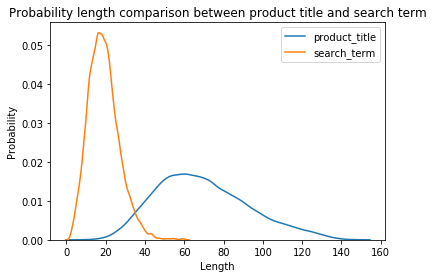

In [21]:
sns.kdeplot(len_product_title)
sns.kdeplot(len_search_term)
plt.title('Probability length comparison between product title and search term')
plt.ylabel('Probability')
plt.xlabel('Length')
plt.show()

In [22]:
train_data['search_term'][:10]

0           angle bracket
1               l bracket
2               deck over
3        rain shower head
4      shower only faucet
5          convection otr
6    microwave over stove
7              microwaves
8         emergency light
9                 mdf 3/4
Name: search_term, dtype: object

In [23]:
train_data['product_title'][:10]

0                    Simpson Strong-Tie 12-Gauge Angle
1                    Simpson Strong-Tie 12-Gauge Angle
2    BEHR Premium Textured DeckOver 1-gal. #SC-141 ...
3    Delta Vero 1-Handle Shower Only Faucet Trim Ki...
4    Delta Vero 1-Handle Shower Only Faucet Trim Ki...
5    Whirlpool 1.9 cu. ft. Over the Range Convectio...
6    Whirlpool 1.9 cu. ft. Over the Range Convectio...
7    Whirlpool 1.9 cu. ft. Over the Range Convectio...
8    Lithonia Lighting Quantum 2-Light Black LED Em...
9    House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...
Name: product_title, dtype: object

### Feature: Relevance

In [24]:
train_data['relevance'].value_counts()

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64
----------------------------------------------------------------------------------------------------


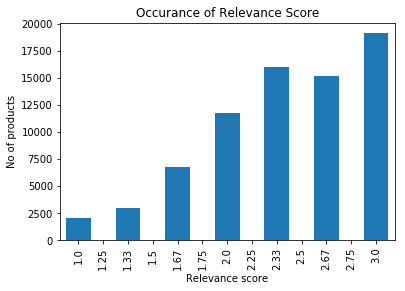

In [25]:
print(train_data['relevance'].value_counts())
print('-'*100)
relevance_score = train_data['relevance'].value_counts().sort_index()
relevance_score.plot(kind='bar',width=1.0)
plt.title('Occurance of Relevance Score')
plt.xlabel('Relevance score')
plt.ylabel('No of products')
plt.show()

In [26]:
train_data[train_data['relevance']==1.25]

,id,product_uid,product_title,search_term,relevance
196,653,100106,Sun Joe Shredder Joe 12 in. 13 Amp 16:1 Reduct...,chipper,1.25
58113,175628,171600,Prime-Line 3/8 in. Galvanized Cable Clamps,cable prime line emergensy open,1.25
64678,194748,185009,Classic Hardware Bosetti Marella Bosetti Marel...,18in hardware coth,1.25
65447,196847,186594,MABIS Single Bed Assist,single sun beds,1.25


In [27]:
train_data[train_data['relevance']==1.5]

,id,product_uid,product_title,search_term,relevance
664,2106,100378,Sigman 6 in. Tarp Ball Bungee (25-Pack),everblit heavy duty canvas dropcloth,1.5
31563,96542,130003,BLACK+DECKER 12-Volt Ni-Cad 3/8 in. Cordless D...,black and decker cordless lantern,1.5
57666,174274,170712,FORGERIGHT Bronze Aluminum Flat Fence Post Cap,gate opener post,1.5
60392,182290,176117,Biodegradable Trash Bags (Pack of 50),compost baag,1.5
63207,190572,181958,Hy-Lite 34 in. x 34 in. Wave Pattern 8 in. Acr...,whitesilicone,1.5


In [28]:
train_data[train_data['relevance']==1.75]

,id,product_uid,product_title,search_term,relevance
380,1220,100210,PC Products 50ml PC-Clear Liquid Epoxy Cartridge,fiberglass repair kit,1.75
1347,4149,100714,FibaTape Standard 1-7/8 in. x 180 ft. White Se...,fiberglass repair kit,1.75
3824,11883,102074,Clopay Garage Door Low Headroom Conversion Kit,storms door replacement parts,1.75
10542,32542,107231,Liberty 2-1/2 in. or 3 in. Brushed Satin Nicke...,cabinet knobs nickle 98cents,1.75
23656,72724,120606,Ryobi 18-Volt ONE+ High Capacity LITHIUM+ Batt...,riobi power tool combo,1.75
27154,83274,124590,3/8 in. x 2 ft. x 4 ft. Cork Panel,3/8 wood plank,1.75
30287,92682,128392,Ideal Pet 7.25 in. x 13 in. Medium Ruff Weathe...,dual wall ducts,1.75
57154,172854,169776,Sun Joe Pressure Joe 1450-PSI 1.45-GPM 11.5 Am...,whirlpool washer 12 inch pedestal,1.75
66896,201074,189824,GE 1.7 cu. ft. Over the Range Microwave in Bla...,refrig. in black over over 25 cu. ft.,1.75


In [29]:
train_data[train_data['relevance']==3.0]

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.0
5,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.0
7,21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.0
9,27,100009,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,mdf 3/4,3.0
...,...,...,...,...,...
74058,221443,206627,25 in. Stainless Tip-Out Sink Front Tray,sink tip-out tray,3.0
74059,221449,206631,Masonite New Haven Three Quarter Oval Lite Pri...,fiberglass front doors by masonite,3.0
74061,221455,206637,Schluter Rondec Stainless Steel 3/8 in. x 1 in...,rondec stainless steel 3/8 edge protection,3.0
74063,221458,206639,Philips 40-Watt Halogen R20 Flood Light Bulb (...,r20 halogen light,3.0


### Train Data EDA Results :

1. Train data has 74067 products with 5 columns ['id', 'product_uid', 'product_title', 'search_term', 'relevance']. 
2. out of total data 54667 are unique products. There are many products which occurs repetedly and the maximum time a product      repeat itself is 21 times and there are also some product which only occured ones . After checking data for product_uid and      product titles we could say that product title behave same as product_uid .
3. just like product title search term also occurs repetedly and the the occurance ranges from min 1 to max 16 . The length of      search term varies from 2 to 60 words and for product title it varies from 9 to 147 words.
4. Relevance represents whether search result is good or bad which varies from 1(bad) to 3(good). The relevance scores which occurs maximum time are [3.0,2.33,2.67,2.0] and scores [1.25,1.50,1.75,2.75] occurs least

## Attribute Data

In [30]:
attribute_data = zipfile.ZipFile('G:/Applied_AI/case_study_1/attributes.csv.zip')
attribute_data = pd.read_csv(attribute_data.open('attributes.csv'),encoding = "ISO-8859-1")

In [31]:
attribute_data.head()

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90Â° connectio...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [32]:
attribute_data.shape

(2044803, 3)

In [33]:
attribute_data.isnull().sum()

product_uid     155
name            155
value          2284
dtype: int64

In [34]:
print('Total no of products in Attribute data :',attribute_data.shape[0])
print('Total no of Unique products in Attribute data :',len(attribute_data['product_uid'].unique()))

Total no of products in Attribute data : 2044803
Total no of Unique products in Attribute data : 86264


### Feature: Product_uid

195932.0    88
100532.0    80
186482.0    79
119037.0    79
219723.0    78
            ..
179264.0     5
204918.0     5
169844.0     5
171763.0     5
193130.0     5
Name: product_uid, Length: 86263, dtype: int64
----------------------------------------------------------------------------------------------------


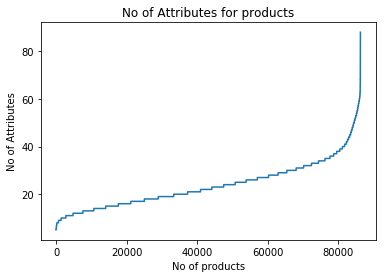

In [35]:
product_uid_attr = attribute_data['product_uid'].value_counts()
print(product_uid_attr)
print('-'*100)
plt.plot(sorted(product_uid_attr.values))
plt.title('No of Attributes for products')
plt.ylabel('No of Attributes')
plt.xlabel('No of products')
plt.show()

### Feature: Name

In [36]:
attr_name = attribute_data['name'].value_counts()

In [37]:
attr_name.index

Index(['MFG Brand Name', 'Bullet02', 'Bullet03', 'Bullet04', 'Bullet01',
       'Product Width (in.)', 'Bullet05', 'Product Height (in.)',
       'Product Depth (in.)', 'Product Weight (lb.)',
       ...
       'Point Type', 'Warming Rack', 'Lens width (in.)', 'Wall Material',
       'Expandable Power Outlet', 'Corded', 'Ram Diameter (in.)',
       'Accent mount material', 'Learning', 'Number of DVI Inputs'],
      dtype='object', length=5410)

MFG Brand Name                 86250
Bullet02                       86248
Bullet03                       86226
Bullet04                       86174
Bullet01                       85940
Product Width (in.)            61137
Bullet05                       60529
Product Height (in.)           54698
Product Depth (in.)            53652
Product Weight (lb.)           45175
Bullet06                       44901
Color Family                   41508
Bullet07                       34349
Material                       31500
Color/Finish                   28564
Bullet08                       26645
Certifications and Listings    24583
Bullet09                       20567
Assembled Height (in.)         18299
Assembled Width (in.)          18263
Name: name, dtype: int64
----------------------------------------------------------------------------------------------------


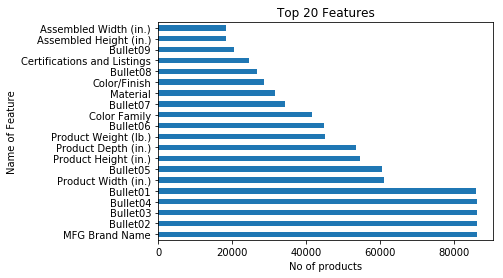

In [38]:
print(attr_name[:20])
print('-'*100)
attr_name[:20].plot(kind='barh')
plt.title('Top 20 Features')
plt.xlabel('No of products')
plt.ylabel('Name of Feature')
plt.show()

In [39]:
len_attr_name = attribute_data['name'].astype('str').str.strip().apply(len)

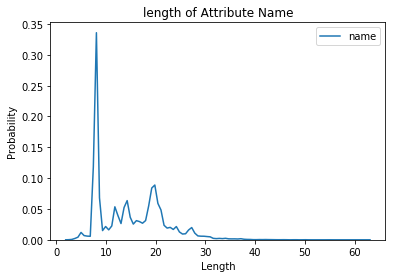

In [40]:
sns.kdeplot(len_attr_name)
plt.title('length of Attribute Name')
plt.ylabel('Probability')
plt.xlabel('Length')
plt.show()

In [41]:
print(20*'-','length of Attribute (Name)',20*'-')
print(20*'-','percentile 0 to 100',20*'-')
for i in range(0,101,10):
    print(i,'th percentile = ',np.percentile(len_attr_name,i))
print(20*'-','percentile 91 to 100',20*'-')
for i in range(91,101,1):
    print(i,'th percentile = ',np.percentile(len_attr_name,i))

-------------------- length of Attribute (Name) --------------------
-------------------- percentile 0 to 100 --------------------
0 th percentile =  3.0
10 th percentile =  8.0
20 th percentile =  8.0
30 th percentile =  8.0
40 th percentile =  12.0
50 th percentile =  14.0
60 th percentile =  17.0
70 th percentile =  19.0
80 th percentile =  20.0
90 th percentile =  24.0
100 th percentile =  62.0
-------------------- percentile 91 to 100 --------------------
91 th percentile =  24.0
92 th percentile =  24.0
93 th percentile =  25.0
94 th percentile =  27.0
95 th percentile =  27.0
96 th percentile =  27.0
97 th percentile =  28.0
98 th percentile =  30.0
99 th percentile =  34.0
100 th percentile =  62.0


In [42]:
unique_attr_name = attribute_data['name'].unique()
print('Total attribute data (NAME) :',attribute_data.shape[0])
print('No of Unique attributes (NAME) :',len(unique_attr_name))

Total attribute data (NAME) : 2044803
No of Unique attributes (NAME) : 5411


### Feature: Value

In [43]:
attr_value = attribute_data['value'].value_counts()

In [44]:
len_attr_value = attribute_data['value'].astype('str').str.strip().apply(len)

Text(0.5,0,'Length')

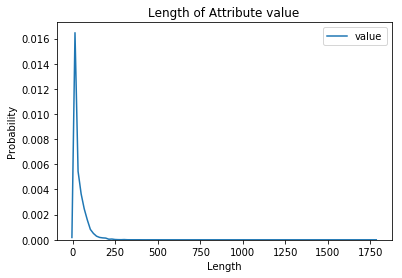

In [45]:
sns.kdeplot(len_attr_value)
plt.title('Length of Attribute value')
plt.ylabel('Probability')
plt.xlabel('Length')

In [46]:
print(20*'-','length of Attribute (Value)',20*'-')
print(20*'-','percentile 0 to 100',20*'-')
for i in range(0,101,10):
    print(i,'th percentile = ',np.percentile(len_attr_value,i))
print(20*'-','percentile 91 to 100',20*'-')
for i in range(91,101,1):
    print(i,'th percentile = ',np.percentile(len_attr_value,i))

-------------------- length of Attribute (Value) --------------------
-------------------- percentile 0 to 100 --------------------
0 th percentile =  1.0
10 th percentile =  2.0
20 th percentile =  3.0
30 th percentile =  4.0
40 th percentile =  5.0
50 th percentile =  8.0
60 th percentile =  12.0
70 th percentile =  20.0
80 th percentile =  36.0
90 th percentile =  64.0
100 th percentile =  1780.0
-------------------- percentile 91 to 100 --------------------
91 th percentile =  68.0
92 th percentile =  72.0
93 th percentile =  76.0
94 th percentile =  82.0
95 th percentile =  89.0
96 th percentile =  95.0
97 th percentile =  105.0
98 th percentile =  121.0
99 th percentile =  154.0
100 th percentile =  1780.0


In [47]:
print('Name:')
print(attribute_data['name'][1])
print('Value:')
print(attribute_data['value'][1])
print('-'*100)
print('Name:')
print(attribute_data['name'][10])
print('Value:')
print(attribute_data['value'][10])
print('-'*100)
print('Name:')
print(attribute_data['name'][100])
print('Value:')
print(attribute_data['value'][100])
print('-'*100)
print('Name:')
print(attribute_data['name'][1000])
print('Value:')
print(attribute_data['value'][1000])

Name:
Bullet02
Value:
Stronger than angled nailing or screw fastening alone
----------------------------------------------------------------------------------------------------
Name:
Number of Pieces
Value:
1
----------------------------------------------------------------------------------------------------
Name:
Portable
Value:
No
----------------------------------------------------------------------------------------------------
Name:
Bullet02
Value:
Suitable for grouting pre-cast concrete, steel columns, anchoring applications and heavy equipment


In [48]:
print('No of products in train data : ', train_data['product_uid'].shape[0])
print('Total no of products in attribute data : ', attribute_data['product_uid'].shape[0])

No of products in train data :  74067
Total no of products in attribute data :  2044803


##### Check common products between Train and Attribute Data

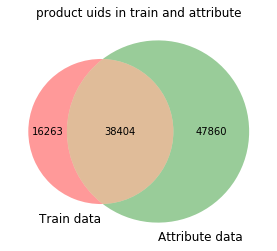

In [49]:
from matplotlib_venn import venn3,venn2
venn2([set(train_data['product_uid'].unique()), set(attribute_data['product_uid'].unique())], ('Train data', 'Attribute data'))
plt.title('product uids in train and attribute')
plt.show()

### Attribute Data EDA Result

1. Attribute data contains 2044803 products with 3 columns namely [product_uid,name,value],there are 86264 unique products present in this dataset. This dataset contains different attributes of products and attribute description.
2. After plotting simple graph we found that each product has minimum 5 attributes and the maximum number of attributes a product has is 88.
3. 'MFG Brand' Name is the most common attribute for products and we also found that product dimenssions are also important attributes along with color and materials used
4. At later part we also checked that if feature 'name' and feature 'value' give more meanigful data
5. After that we found that not all products from train dataset present in attribute dataset. There are only 38404 common products between Train and Attribute data

## Product Description

In [50]:
description_data = zipfile.ZipFile('G:/Applied_AI/case_study_1/product_descriptions.csv.zip')
description_data = pd.read_csv(description_data.open('product_descriptions.csv'),encoding = "ISO-8859-1")

In [51]:
description_data.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [52]:
description_data.shape

(124428, 2)

In [53]:
print('Total no of products in description data :',description_data.shape[0])
print('unique products in description data :',len(description_data['product_uid'].unique()))

Total no of products in description data : 124428
unique products in description data : 124428


In [54]:
product_uid_des = description_data['product_uid'].value_counts()

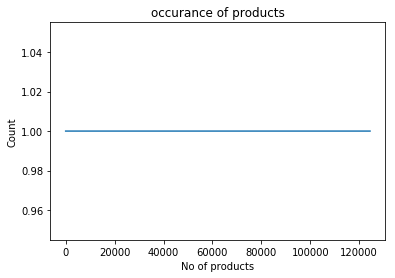

In [55]:
plt.plot(product_uid_des.values)
plt.title('occurance of products')
plt.xlabel('No of products')
plt.ylabel('Count')
plt.show()

In [56]:
print(description_data['product_description'][0])
print('-'*100)
print(description_data['product_description'][10])
print('-'*100)
print(description_data['product_description'][100])

Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a "Z" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws
----------------------------------------------------------------------------------------------------
Recycler 22 in. Personal Pace Variable Speed Self-P

In [57]:
description_data.isnull().sum()

product_uid            0
product_description    0
dtype: int64

In [58]:
len_prod_desrip = description_data['product_description'].str.strip().apply(len)

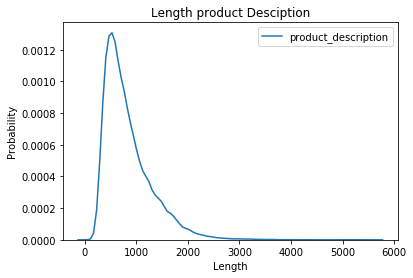

In [59]:
sns.kdeplot(len_prod_desrip)
plt.title('Length product Desciption')
plt.ylabel('Probability')
plt.xlabel('Length')
plt.show()

In [60]:
print(20*'-','length of product description',20*'-')
print(20*'-','percentile 0 to 100',20*'-')
for i in range(0,101,10):
    print(i,'th percentile = ',np.percentile(len_prod_desrip,i))
print(20*'-','percentile 91 to 100',20*'-')
for i in range(91,101,1):
    print(i,'th percentile = ',np.percentile(len_prod_desrip,i))

-------------------- length of product description --------------------
-------------------- percentile 0 to 100 --------------------
0 th percentile =  8.0
10 th percentile =  390.0
20 th percentile =  470.0
30 th percentile =  545.0
40 th percentile =  624.0
50 th percentile =  717.0
60 th percentile =  824.0
70 th percentile =  961.0
80 th percentile =  1160.0
90 th percentile =  1475.0
100 th percentile =  5641.0
-------------------- percentile 91 to 100 --------------------
91 th percentile =  1511.0
92 th percentile =  1560.0
93 th percentile =  1615.0
94 th percentile =  1675.0
95 th percentile =  1737.0
96 th percentile =  1816.0
97 th percentile =  1932.0
98 th percentile =  2084.0
99 th percentile =  2368.729999999996
100 th percentile =  5641.0


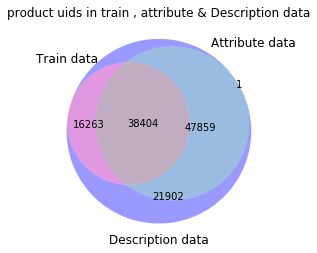

In [61]:
venn3([set(train_data['product_uid'].unique()), set(attribute_data['product_uid'].unique()),set(description_data['product_uid'].unique())], ('Train data', 'Attribute data','Description data'))
plt.title('product uids in train , attribute & Description data')
plt.show()

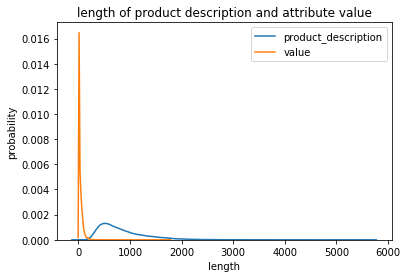

In [63]:
sns.kdeplot(len_prod_desrip)
sns.kdeplot(len_attr_value)
plt.title('length of product description and attribute value')
plt.ylabel('probability')
plt.xlabel('length')
plt.show()

## Product Description EDA Result:

1. product_description data has 124428 products which contains data about product_uid and their detail description . In this dataset all products are unique.
2. All products from train and attribute data are present in description data . The length of descriptions varies from 8 words to 5461 words.

In [64]:
# Reference :- https://www.geeksforgeeks.org/generating-word-cloud-python/
def word_cloud(data):
    comment_words = ''
    stopwords = set(STOPWORDS)

    for val in data:
        val = str(val)
        tokens = val.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,background_color ='salmon',stopwords = stopwords,colormap='Pastel1',min_font_size = 10).generate(comment_words)


    plt.figure(figsize = (12, 12), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()


# Apply WORDCLOUD on features

## 1.TITLE

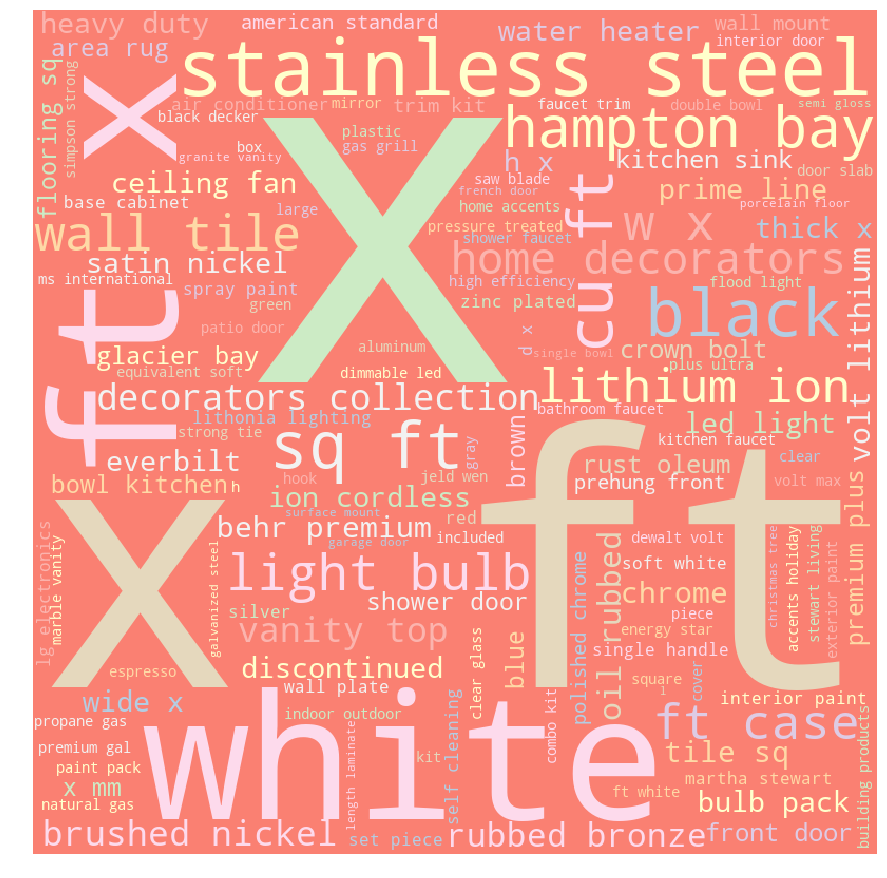

In [65]:
word_cloud(train_data['product_title'])

## 2.Search term

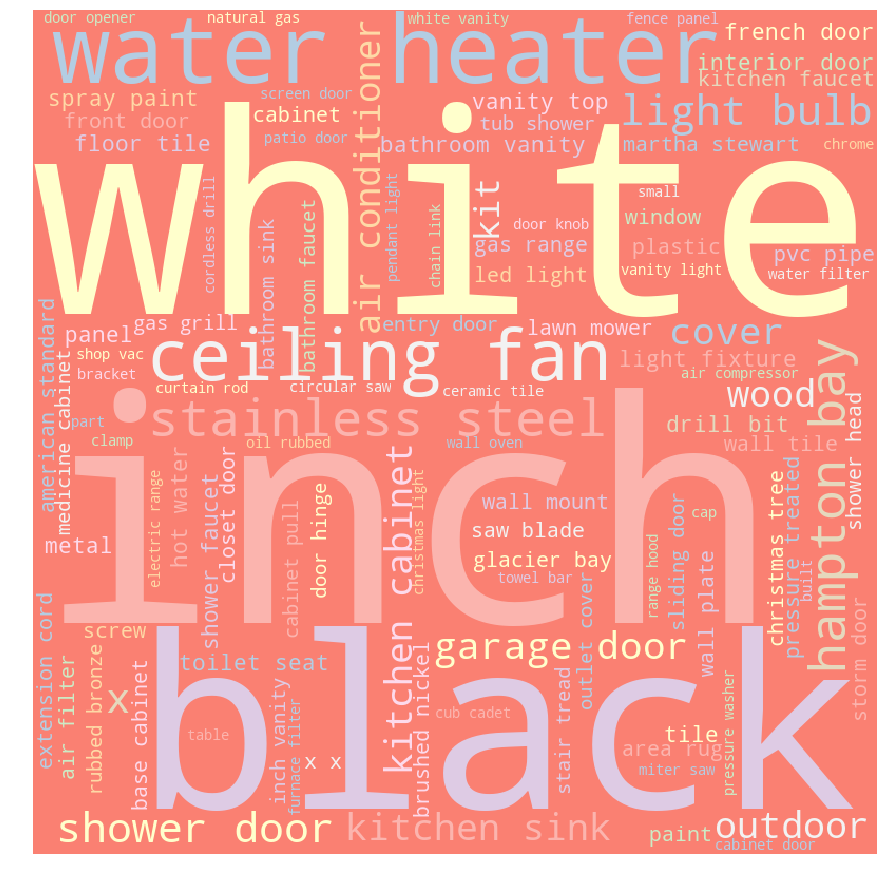

In [66]:
word_cloud(train_data['search_term'])

## Attribute Data (Name)

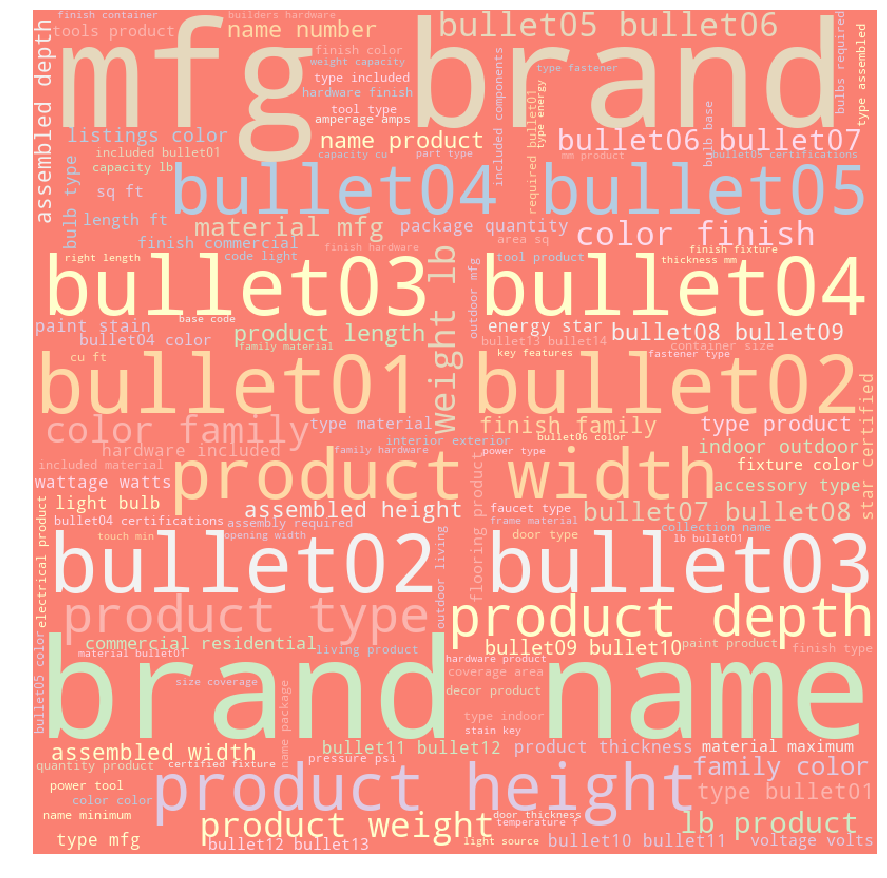

In [67]:
word_cloud(attribute_data['name'])

## Attribute Data (value)

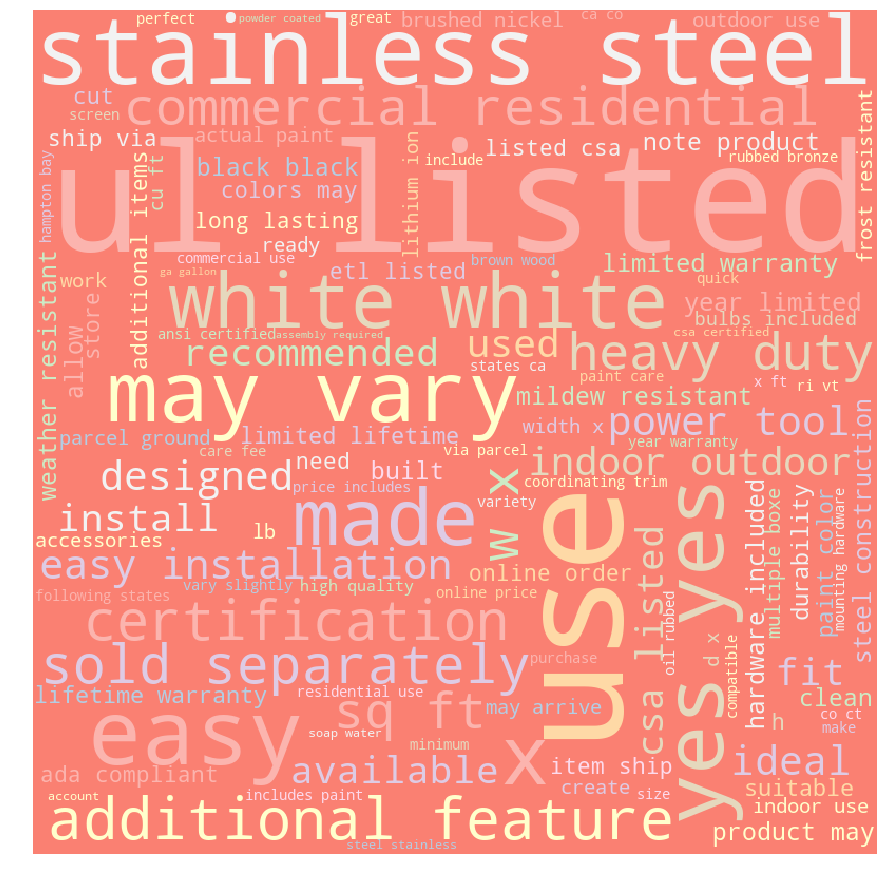

In [68]:
word_cloud(attribute_data['value'])

# Conclusion:

1. MFG brand and product dimensions are the top attributes that majority of product contains .
    we need to standardize the measuring units like in.--> inch,
    lb/lbs --> pound etc. 
    and as for the MFG brand we can generate new column specific for brand name which could be useful. 
    
2. In Attribute data instead of using name and value data separately if we combine them it gives more meanigful result

Train data : 
1. Train data contains 74,067 products with 54,667 unique products and having 5 columns namely id,product uid ,product title, search term , relevance.
2. There are products which occur multiple time the maximum number is of 21 and there are also some products which occured only once.
3. the relevance sccore shows whether search query provides perfect match or not . 1 being worst match and 3 being perfect match.
4. From relevance value graph we can see that values 3.0,2.33,2.67,2.0 occured more than 10,000 times
   
Test Data:
166693
1. Test data contains 166,000